In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [1109]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [1110]:
train.shape

(164309, 14)

In [1111]:
train.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [1112]:
train.shape

(164309, 14)

In [1113]:
test.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [1114]:
test.shape

(109541, 13)

In [1115]:
test.shape

(109541, 13)

In [1116]:
print("Train data shape: {}".format(train.shape))
print("Test data shape: {}".format(test.shape))

Train data shape: (164309, 14)
Test data shape: (109541, 13)


In [1117]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [1118]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [1119]:
train['Home_Owner'].unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [1120]:
X = train.drop('Interest_Rate',axis=1)
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female


In [1121]:
X = X.append(test)
X.shape

(273850, 13)

In [1122]:
y = train['Interest_Rate']
y

0         1
1         3
2         3
3         3
4         1
         ..
164304    2
164305    2
164306    1
164307    3
164308    2
Name: Interest_Rate, Length: 164309, dtype: int64

In [1123]:
home_owner_dummy = pd.get_dummies(X['Home_Owner'])
home_owner_dummy.head()

,Mortgage,None,Other,Own,Rent
0,0,0,0,0,1
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [1124]:
X = pd.concat([X,home_owner_dummy],axis=1)
X = X.drop('Home_Owner',axis=1)
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Mortgage,None,Other,Own,Rent
0,10000001,"7,000",< 1 year,68000.0,not verified,car,18.37,0,NaN,9,14,Female,0,0,0,0,1
1,10000002,"30,000",4 years,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,1,0,0,0,0
2,10000003,"24,725",7 years,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,1,0,0,0,0
3,10000004,"16,000",< 1 year,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,0,0,0,0,0
4,10000005,"17,000",8 years,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,0,0,0,1,0


In [1125]:
income_verified_dummies = pd.get_dummies(X['Income_Verified'])
income_verified_dummies

,VERIFIED - income,VERIFIED - income source,not verified
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
109536,1,0,0
109537,0,0,1
109538,0,0,1
109539,0,0,1


In [1126]:
X = pd.concat([X,income_verified_dummies],axis=1)
X = X.drop('Income_Verified',axis=1)
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified
0,10000001,"7,000",< 1 year,68000.0,car,18.37,0,NaN,9,14,Female,0,0,0,0,1,0,0,1
1,10000002,"30,000",4 years,NaN,debt_consolidation,14.93,0,17.0,12,24,Female,1,0,0,0,0,1,0,0
2,10000003,"24,725",7 years,75566.4,debt_consolidation,15.88,0,NaN,12,16,Male,1,0,0,0,0,0,1,0
3,10000004,"16,000",< 1 year,56160.0,debt_consolidation,14.34,3,NaN,16,22,Male,0,0,0,0,0,0,1,0
4,10000005,"17,000",8 years,96000.0,debt_consolidation,22.17,1,NaN,19,30,Female,0,0,0,1,0,0,1,0


In [1127]:
purpose_loan_dummies = pd.get_dummies(X['Purpose_Of_Loan'])
purpose_loan_dummies

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,0,0,0,0,0,0,0,0,0,1,0,0,0,0
109537,0,1,0,0,0,0,0,0,0,0,0,0,0,0
109538,0,1,0,0,0,0,0,0,0,0,0,0,0,0
109539,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1128]:
X = pd.concat([X,purpose_loan_dummies],axis=1)
X = X.drop('Purpose_Of_Loan',axis=1)
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000001,"7,000",< 1 year,68000.0,18.37,0,NaN,9,14,Female,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10000002,"30,000",4 years,NaN,14.93,0,17.0,12,24,Female,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,10000003,"24,725",7 years,75566.4,15.88,0,NaN,12,16,Male,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,10000004,"16,000",< 1 year,56160.0,14.34,3,NaN,16,22,Male,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,10000005,"17,000",8 years,96000.0,22.17,1,NaN,19,30,Female,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1129]:
gender_dummies = pd.get_dummies(X['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [1130]:
gender_dummies.shape

(273850, 2)

In [1131]:
X = pd.concat([X,gender_dummies],axis=1)
X = X.drop('Gender',axis=1)
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male
0,10000001,"7,000",< 1 year,68000.0,18.37,0,NaN,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000002,"30,000",4 years,NaN,14.93,0,17.0,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000003,"24,725",7 years,75566.4,15.88,0,NaN,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10000004,"16,000",< 1 year,56160.0,14.34,3,NaN,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10000005,"17,000",8 years,96000.0,22.17,1,NaN,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1132]:
X.reset_index(inplace=True)
X.head()

,index,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male
0,0,10000001,"7,000",< 1 year,68000.0,18.37,0,NaN,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,10000002,"30,000",4 years,NaN,14.93,0,17.0,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,10000003,"24,725",7 years,75566.4,15.88,0,NaN,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,10000004,"16,000",< 1 year,56160.0,14.34,3,NaN,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,10000005,"17,000",8 years,96000.0,22.17,1,NaN,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1133]:
X.drop('index',inplace=True,axis=1)
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male
0,10000001,"7,000",< 1 year,68000.0,18.37,0,NaN,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000002,"30,000",4 years,NaN,14.93,0,17.0,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000003,"24,725",7 years,75566.4,15.88,0,NaN,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10000004,"16,000",< 1 year,56160.0,14.34,3,NaN,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10000005,"17,000",8 years,96000.0,22.17,1,NaN,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
X['Annual_Income'] = X['Annual_Income'].fillna(X['Annual_Income'].mean())
X['Months_Since_Deliquency'] = X['Months_Since_Deliquency'].fillna(X['Months_Since_Deliquency'].mean())

In [1135]:
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male
0,10000001,"7,000",< 1 year,68000.000000,18.37,0,34.103395,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000002,"30,000",4 years,73392.793977,14.93,0,17.000000,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000003,"24,725",7 years,75566.400000,15.88,0,34.103395,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10000004,"16,000",< 1 year,56160.000000,14.34,3,34.103395,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10000005,"17,000",8 years,96000.000000,22.17,1,34.103395,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
annual_income = []
for i in range(len(X['Annual_Income'])):
  Z = int(X['Annual_Income'][i])
  annual_income.append(Z)

In [1137]:
X.drop('Annual_Income',axis=1)
X.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male
0,10000001,"7,000",< 1 year,68000.000000,18.37,0,34.103395,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000002,"30,000",4 years,73392.793977,14.93,0,17.000000,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000003,"24,725",7 years,75566.400000,15.88,0,34.103395,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10000004,"16,000",< 1 year,56160.000000,14.34,3,34.103395,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10000005,"17,000",8 years,96000.000000,22.17,1,34.103395,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1138]:
X['Annual_Income'] = annual_income
X

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male
0,10000001,"7,000",< 1 year,68000,18.37,0,34.103395,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000002,"30,000",4 years,73392,14.93,0,17.000000,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000003,"24,725",7 years,75566,15.88,0,34.103395,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10000004,"16,000",< 1 year,56160,14.34,3,34.103395,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10000005,"17,000",8 years,96000,22.17,1,34.103395,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273845,10273846,"15,000",9 years,120000,8.15,2,32.000000,13,57,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
273846,10273847,"9,600",10+ years,125000,9.08,1,17.000000,9,34,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
273847,10273848,"2,000",5 years,37850,11.60,0,34.103395,10,11,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
273848,10273849,"2,125",6 years,30000,24.88,0,34.103395,5,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
import re

In [0]:
amount = []
for i in range(len(X['Loan_Amount_Requested'])):
  Z = re.sub('[^0-9]','',X['Loan_Amount_Requested'][i])
  amount.append(Z)

In [1141]:
X = X.drop('Loan_Amount_Requested',axis=1)
X.head()

,Loan_ID,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male
0,10000001,< 1 year,68000,18.37,0,34.103395,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000002,4 years,73392,14.93,0,17.000000,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000003,7 years,75566,15.88,0,34.103395,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10000004,< 1 year,56160,14.34,3,34.103395,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10000005,8 years,96000,22.17,1,34.103395,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1142]:
X['Loan_Amount_Requested'] = amount
X.head()

,Loan_ID,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male,Loan_Amount_Requested
0,10000001,< 1 year,68000,18.37,0,34.103395,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7000
1,10000002,4 years,73392,14.93,0,17.000000,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,30000
2,10000003,7 years,75566,15.88,0,34.103395,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24725
3,10000004,< 1 year,56160,14.34,3,34.103395,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,16000
4,10000005,8 years,96000,22.17,1,34.103395,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,17000


In [0]:
debt_incomes = []

for i in range(len(X['Debt_To_Income'])):
  Z = round(X['Debt_To_Income'][i])
  debt_incomes.append(Z)

In [1144]:
debt_incomes[:5]

[18.0, 15.0, 16.0, 14.0, 22.0]

In [0]:
debt_to_inc = []

for i in range(len(debt_incomes)):
  Z = int(debt_incomes[i])
  debt_to_inc.append(Z)

In [1146]:
debt_to_inc[:5]

[18, 15, 16, 14, 22]

In [1147]:
X = X.drop('Debt_To_Income',axis=1)
X.head()

,Loan_ID,Length_Employed,Annual_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male,Loan_Amount_Requested
0,10000001,< 1 year,68000,0,34.103395,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7000
1,10000002,4 years,73392,0,17.000000,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,30000
2,10000003,7 years,75566,0,34.103395,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24725
3,10000004,< 1 year,56160,3,34.103395,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,16000
4,10000005,8 years,96000,1,34.103395,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,17000


In [1148]:
X['Debt_To_Income'] = debt_to_inc
X

,Loan_ID,Length_Employed,Annual_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male,Loan_Amount_Requested,Debt_To_Income
0,10000001,< 1 year,68000,0,34.103395,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7000,18
1,10000002,4 years,73392,0,17.000000,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,30000,15
2,10000003,7 years,75566,0,34.103395,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24725,16
3,10000004,< 1 year,56160,3,34.103395,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,16000,14
4,10000005,8 years,96000,1,34.103395,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,17000,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273845,10273846,9 years,120000,2,32.000000,13,57,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,15000,8
273846,10273847,10+ years,125000,1,17.000000,9,34,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9600,9
273847,10273848,5 years,37850,0,34.103395,10,11,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2000,12
273848,10273849,6 years,30000,0,34.103395,5,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2125,25


In [0]:
months = []

for i in range(len(X['Months_Since_Deliquency'])):
  Z = int(X['Months_Since_Deliquency'][i])
  months.append(Z)

In [1150]:
months[:5]

[34, 17, 34, 34, 34]

In [1151]:
X = X.drop('Months_Since_Deliquency',axis=1)
X['Months_Since_Deliquency'] = months
X.head()

,Loan_ID,Length_Employed,Annual_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male,Loan_Amount_Requested,Debt_To_Income,Months_Since_Deliquency
0,10000001,< 1 year,68000,0,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7000,18,34
1,10000002,4 years,73392,0,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,30000,15,17
2,10000003,7 years,75566,0,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24725,16,34
3,10000004,< 1 year,56160,3,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,16000,14,34
4,10000005,8 years,96000,1,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,17000,22,34


In [0]:
X['Length_Employed'] = X['Length_Employed'].fillna(0)
length = []

for i in range(len(X['Length_Employed'])):
  #Z = re.sub('\s+','',str(X['Length_Employed'][i]))
  Z = re.sub('[^0-9]','',str(X['Length_Employed'][i]))
  length.append(Z)

In [1153]:
length[:5]

['1', '4', '7', '1', '8']

In [1154]:
X = X.drop('Length_Employed',axis=1)
X['Length_Employed'] = length
X.head()

,Loan_ID,Annual_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male,Loan_Amount_Requested,Debt_To_Income,Months_Since_Deliquency,Length_Employed
0,10000001,68000,0,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7000,18,34,1
1,10000002,73392,0,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,30000,15,17,4
2,10000003,75566,0,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24725,16,34,7
3,10000004,56160,3,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,16000,14,34,1
4,10000005,96000,1,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,17000,22,34,8


In [1155]:
X['Length_Employed'].unique()

array(['1', '4', '7', '8', '2', '10', '0', '6', '9', '3', '5'],
      dtype=object)

In [1156]:
type(X['Length_Employed'][0])

str

In [0]:
length_emp = []

for i in range(len(X['Length_Employed'])):
  Z = int(X['Length_Employed'][i])
  length_emp.append(Z)

In [1158]:
length_emp[:5]

[1, 4, 7, 1, 8]

In [1159]:
type(length_emp[0])

int

In [1160]:
len(length_emp)

273850

In [1161]:
X = X.drop('Length_Employed',axis=1)
X['Length_Employed'] = length_emp
X.head()

,Loan_ID,Annual_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Mortgage,None,Other,Own,Rent,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male,Loan_Amount_Requested,Debt_To_Income,Months_Since_Deliquency,Length_Employed
0,10000001,68000,0,9,14,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7000,18,34,1
1,10000002,73392,0,12,24,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,30000,15,17,4
2,10000003,75566,0,12,16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24725,16,34,7
3,10000004,56160,3,16,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,16000,14,34,1
4,10000005,96000,1,19,30,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,17000,22,34,8


In [1162]:
len(length_emp)

273850

In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [1164]:
y = lb.fit_transform(y)
len(y)

164309

In [1165]:
X_train = X[:164309]
X_train.shape

(164309, 33)

In [1166]:
X_test = X[164309:]
X_test.shape

(109541, 33)

In [1167]:
y_train = y
y_train.shape

(164309, 3)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [1169]:
X_training = X_train[:140000]
X_training.shape

(140000, 33)

In [1170]:
X_valid = X_train[140000:]
X_valid.shape

(24309, 33)

In [1171]:
X_train.shape

(164309, 33)

In [1172]:
y_training = y_train[:140000]
y_training.shape

(140000, 3)

In [1173]:
y_valid = y_train[140000:]
y_valid.shape

(24309, 3)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [0]:
model = Sequential()

In [0]:
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [1178]:
history = model.fit(X_training,y_training,validation_data=(X_valid,y_valid),batch_size=1024,epochs=5)

Train on 140000 samples, validate on 24309 samples
Epoch 1/5
140000/140000 [==============================] - 4s 32us/step - loss: 0.5835 - accuracy: 0.6818 - val_loss: 0.5734 - val_accuracy: 0.6867
Epoch 2/5
140000/140000 [==============================] - 4s 31us/step - loss: 0.5746 - accuracy: 0.6871 - val_loss: 0.5719 - val_accuracy: 0.6888
Epoch 3/5
140000/140000 [==============================] - 4s 31us/step - loss: 0.5724 - accuracy: 0.6883 - val_loss: 0.5712 - val_accuracy: 0.6884
Epoch 4/5
140000/140000 [==============================] - 4s 31us/step - loss: 0.5710 - accuracy: 0.6899 - val_loss: 0.5701 - val_accuracy: 0.6886
Epoch 5/5
140000/140000 [==============================] - 4s 30us/step - loss: 0.5704 - accuracy: 0.6900 - val_loss: 0.5698 - val_accuracy: 0.6899


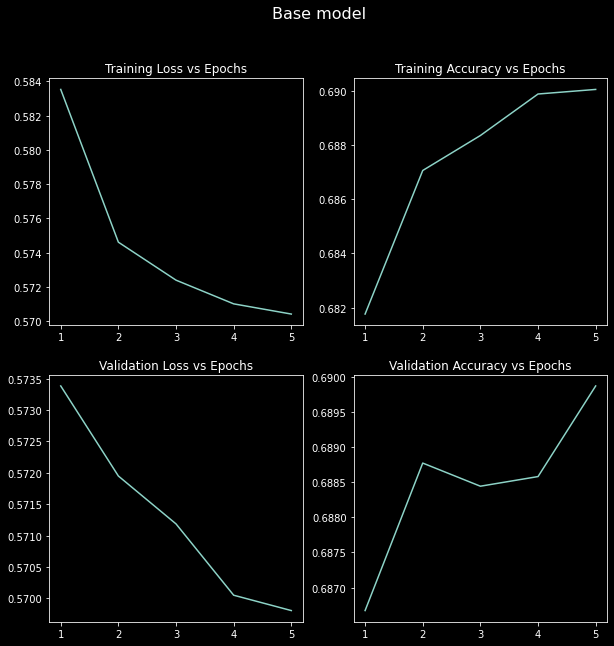

In [1179]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 6), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 6), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 6), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 6), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('Base model', size=16)
plt.show()

In [1180]:
y_pred = model.predict_classes(X_test)
y_pred

array([1, 0, 2, ..., 1, 2, 1])

In [1181]:
sub = pd.read_csv('/content/sample_submission.csv')
sub.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,1
2,10164312,1
3,10164313,1
4,10164314,1


In [1182]:
len(y_pred)

109541

In [1183]:
len(sub)

109541

In [1184]:
sub.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,1
2,10164312,1
3,10164313,1
4,10164314,1


In [1185]:
sub.isna().sum()

Loan_ID          0
Interest_Rate    0
dtype: int64

In [1186]:
sub['Output_Interest_Rate'] = y_pred
sub.head()

,Loan_ID,Interest_Rate,Output_Interest_Rate
0,10164310,1,1
1,10164311,1,0
2,10164312,1,2
3,10164313,1,1
4,10164314,1,1


In [1187]:
y_pred = pd.DataFrame(y_pred)
sub['Output_Interest_Rate'] = y_pred
sub.head()

,Loan_ID,Interest_Rate,Output_Interest_Rate
0,10164310,1,1
1,10164311,1,0
2,10164312,1,2
3,10164313,1,1
4,10164314,1,1


In [1188]:
y_pred

,0
0,1
1,0
2,2
3,1
4,1
...,...
109536,2
109537,0
109538,1
109539,2


In [1200]:
score = model.evaluate(X_test,y_pred)
score

109541/109541 [==============================] - 3s 30us/step


[0.39917150011801855, 0.8571119904518127]

In [1201]:
print('Accuracy score: {}'.format(score[1]*100))

Accuracy score: 85.71119904518127


In [1202]:
y_pred

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [1204]:
predictions = np.argmax(y_pred,axis=1)
predictions

array([1, 0, 2, ..., 1, 2, 1])

In [0]:
data = pd.DataFrame({
    'Loan_ID':sub['Loan_ID'],
    'Interest_Rate':predictions
})

In [1206]:
data.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,0
2,10164312,2
3,10164313,1
4,10164314,1


In [0]:
data.to_csv('submission.csv')